A**nalyzing the Scores of the Vietnamese National College Entrance Exam (2022–2024): Data Manipulation and Visualization**


Each year, millions of high school graduates in Vietnam take the National College Entrance Exam, a pivotal test that determines their eligibility for over 90% of college programs. This exam is regarded as the most competitive and significant milestone in a student’s academic journey, as college admission depends almost entirely on the results. With approximately 80% of high school graduates aspiring to attend college, the number of candidates reaches millions annually.

The exam structure and policies are well-defined. It includes nine subjects: Mathematics, Literature, English, Physics, Chemistry, Biology, History, Geography, and Civic Education. Among these, three core subjects—Mathematics, Literature, and English—are mandatory for all students. Candidates also have to seclect one of two subject groups:

1. Natural Sciences Group: Physics, Chemistry, Biology.
2. Social Sciences Group: History, Geography, Civic Education.


Students must take six subjects, comprising the three core subjects (Math, Literature, English)  and three additional ones from the chosen group (Natural Sciences Group or Social Sciences Group), depending on their intended college major.

After that, students must select 3 out of the 6 subjects to calculate their total score, with a maximum possible sum of 30 points (10 points per subject). this is known as "subject clusters, and there are many diffrent subject clusters, but
the most popular clusters include:

- A00: Mathematics, Physics, Chemistry.
- A01: Mathematics, Physics, English.
- D01: Mathematics, Literature, English.
- B00: Mathematics, Chemistry, Biology.
- C00: Literature, History, Geography.

To uncover insights, I embarked on this project to answer these questions:

part one: about candidate
1. Total Candidates Over the Years/ Growth Rate of Candidates Over the Years

part 2: about subjects score:
2. Average Score of Subjects Over Time
3. the distribution of every subjects scores over 3 years
4. the statistical distribution of every subjects in every years
5. Correlation Matrix of subject Scores Across All Subjects Over Years
6. Correlation Matrix of Subject Scores Over each of Three Years



part 3: about Social and Natural Science group:
7. percent of Candidates Participating in each group every years


part 4: about cluster
8. Score Distribution of Subject Cluster from 2022 to 2024
9. statistical measures of questions 5.
10. Correlation Matrix of Subject Cluster Scores over Three years
11. Correlation Matrix of Subject Cluster Scores over each year


Beyond data analysis, my goal is to provide valuable insights to students preparing for this exam those who have already taken it, and anyone interested in the educational landscape in Vietnam. This project aims to foster understanding and spark meaningful discussions or ven for entertaining about this critical examination.













since this data is from national educational system, it already been cleaned. therefore, i will jump right to it, and exploring the fist part:

part 1: about candidate
1. Total Candidates Over the Years/ Growth Rate of Candidates Over the Years







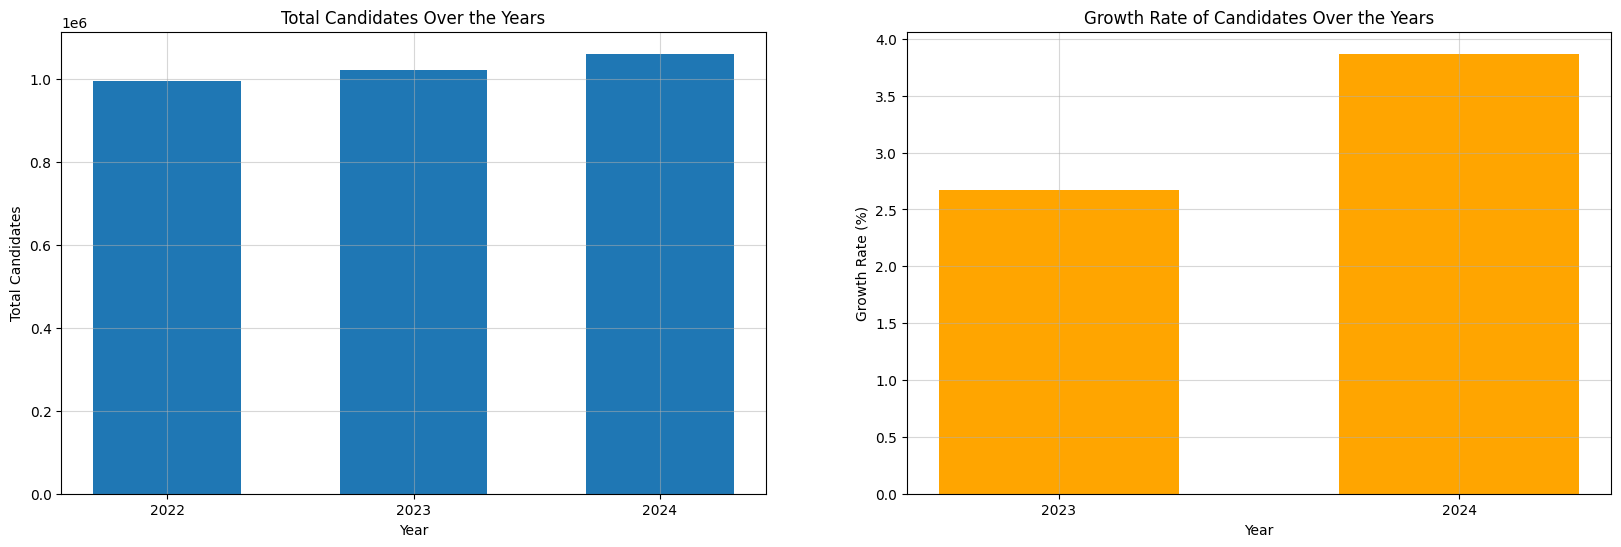

In [ ]:

# 1. Total Candidates Over the Years/ Growth Rate of Candidates Over the Years

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import files
import os

df2 = pd.read_csv('diem_thi_thpt_2022.csv')
df3 = pd.read_csv('diem_thi_thpt_2023.csv')
df4 = pd.read_csv('diem_thi_thpt_2024.csv')

total_df1 = len(df2)
total_df2 = len(df3)
total_df3 = len(df4)

y = [total_df1, total_df2, total_df3]
x = [ '2022', '2023', '2024']

fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].bar(x, y,width=0.6 )
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Total Candidates')
ax[0].set_title('Total Candidates Over the Years')
ax[0].grid(alpha = 0.5)

growth_rate = [0]
for i in range(1, len(y)):
    rate = ((y[i] - y[i-1]) / y[i-1]) * 100
    growth_rate.append(rate)

ax[1].bar(x[1:], growth_rate[1:], width=0.6, color = 'orange')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Growth Rate (%)')
ax[1].set_title('Growth Rate of Candidates Over the Years')
ax[1].grid(alpha = 0.5)
plt.show()



part 2: about subjects score:

2. Average Score of Subjects Over Time
3. the distribution of every subjects scores over 3 years
4. the statistical distribution of every subjects in every years
5. Correlation Matrix of Subject Scores Over the Years
6. Correlation Matrix of subject Scores Across All Subjects Over Three Years



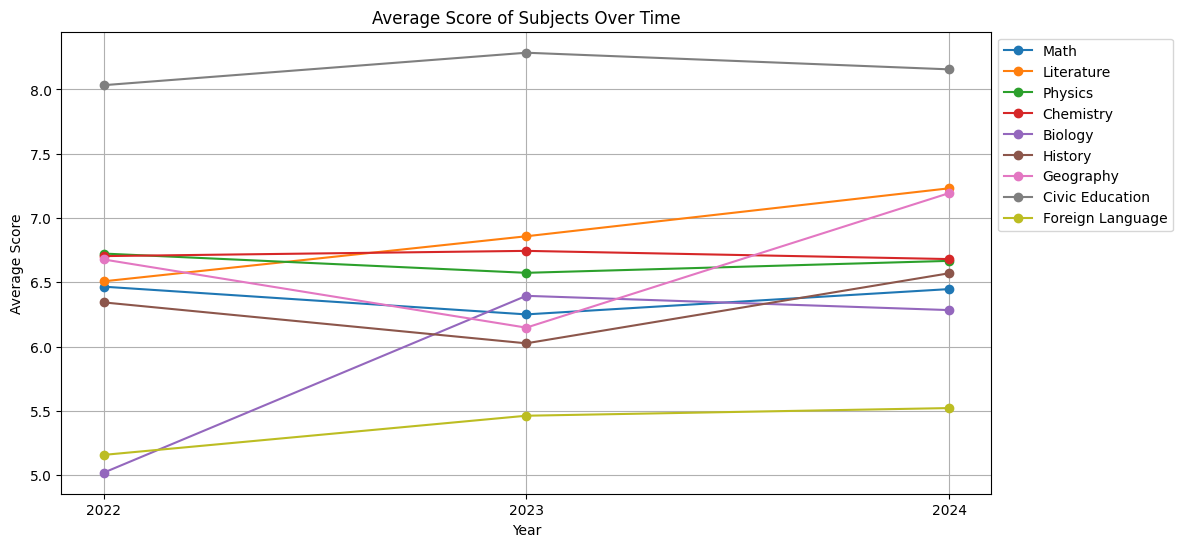

In [ ]:
# 2. Average Score of Subjects Over Time
subjects = ['Toán', 'Văn', 'Lý', 'Hoá', 'Sinh', 'Lịch Sử', 'Địa Lý', 'GDCD', 'Ngoại Ngữ']
years = ['2022', '2023', '2024']

subject_mapping = {
    'df2': {'Toán': 'toan', 'Văn': 'ngu_van', 'Lý': 'vat_li', 'Hoá': 'hoa_hoc', 'Sinh': 'sinh_hoc', 'Lịch Sử': 'lich_su', 'Địa Lý': 'dia_li', 'GDCD': 'gdcd', 'Ngoại Ngữ': 'ngoai_ngu'},
    'df3': {'Toán': 'toan', 'Văn': 'ngu_van', 'Lý': 'vat_li', 'Hoá': 'hoa_hoc', 'Sinh': 'sinh_hoc', 'Lịch Sử': 'lich_su', 'Địa Lý': 'dia_li', 'GDCD': 'gdcd', 'Ngoại Ngữ': 'ngoai_ngu'},
    'df4': {'Toán': 'toan', 'Văn': 'ngu_van', 'Lý': 'vat_li', 'Hoá': 'hoa_hoc', 'Sinh': 'sinh_hoc', 'Lịch Sử': 'lich_su', 'Địa Lý': 'dia_li', 'GDCD': 'gdcd', 'Ngoại Ngữ': 'ngoai_ngu'}
}

dfs = {'df2': df2, 'df3': df3, 'df4': df4}

legend_translation = {
    'Toán': 'Math',
    'Văn': 'Literature',
    'Lý': 'Physics',
    'Hoá': 'Chemistry',
    'Sinh': 'Biology',
    'Lịch Sử': 'History',
    'Địa Lý': 'Geography',
    'GDCD': 'Civic Education',
    'Ngoại Ngữ': 'Foreign Language',

}


average_scores = {}
for subject in subjects:
    average_scores[subject] = []

for df_name, df in dfs.items():
    for subject in subjects:
        column_name = subject_mapping[df_name].get(subject)


        if column_name is not None and column_name in df.columns:
            avg_score = df[column_name].mean()
            average_scores[subject].append(avg_score)
        else:
            average_scores[subject].append(None)


plt.figure(figsize=(12, 6))

for subject, scores in average_scores.items():
    plt.plot(years, scores, marker='o', label= legend_translation.get(subject, subject))

plt.xlabel('Year')
plt.ylabel('Average Score')
plt.title('Average Score of Subjects Over Time')
plt.grid(True)
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.show()


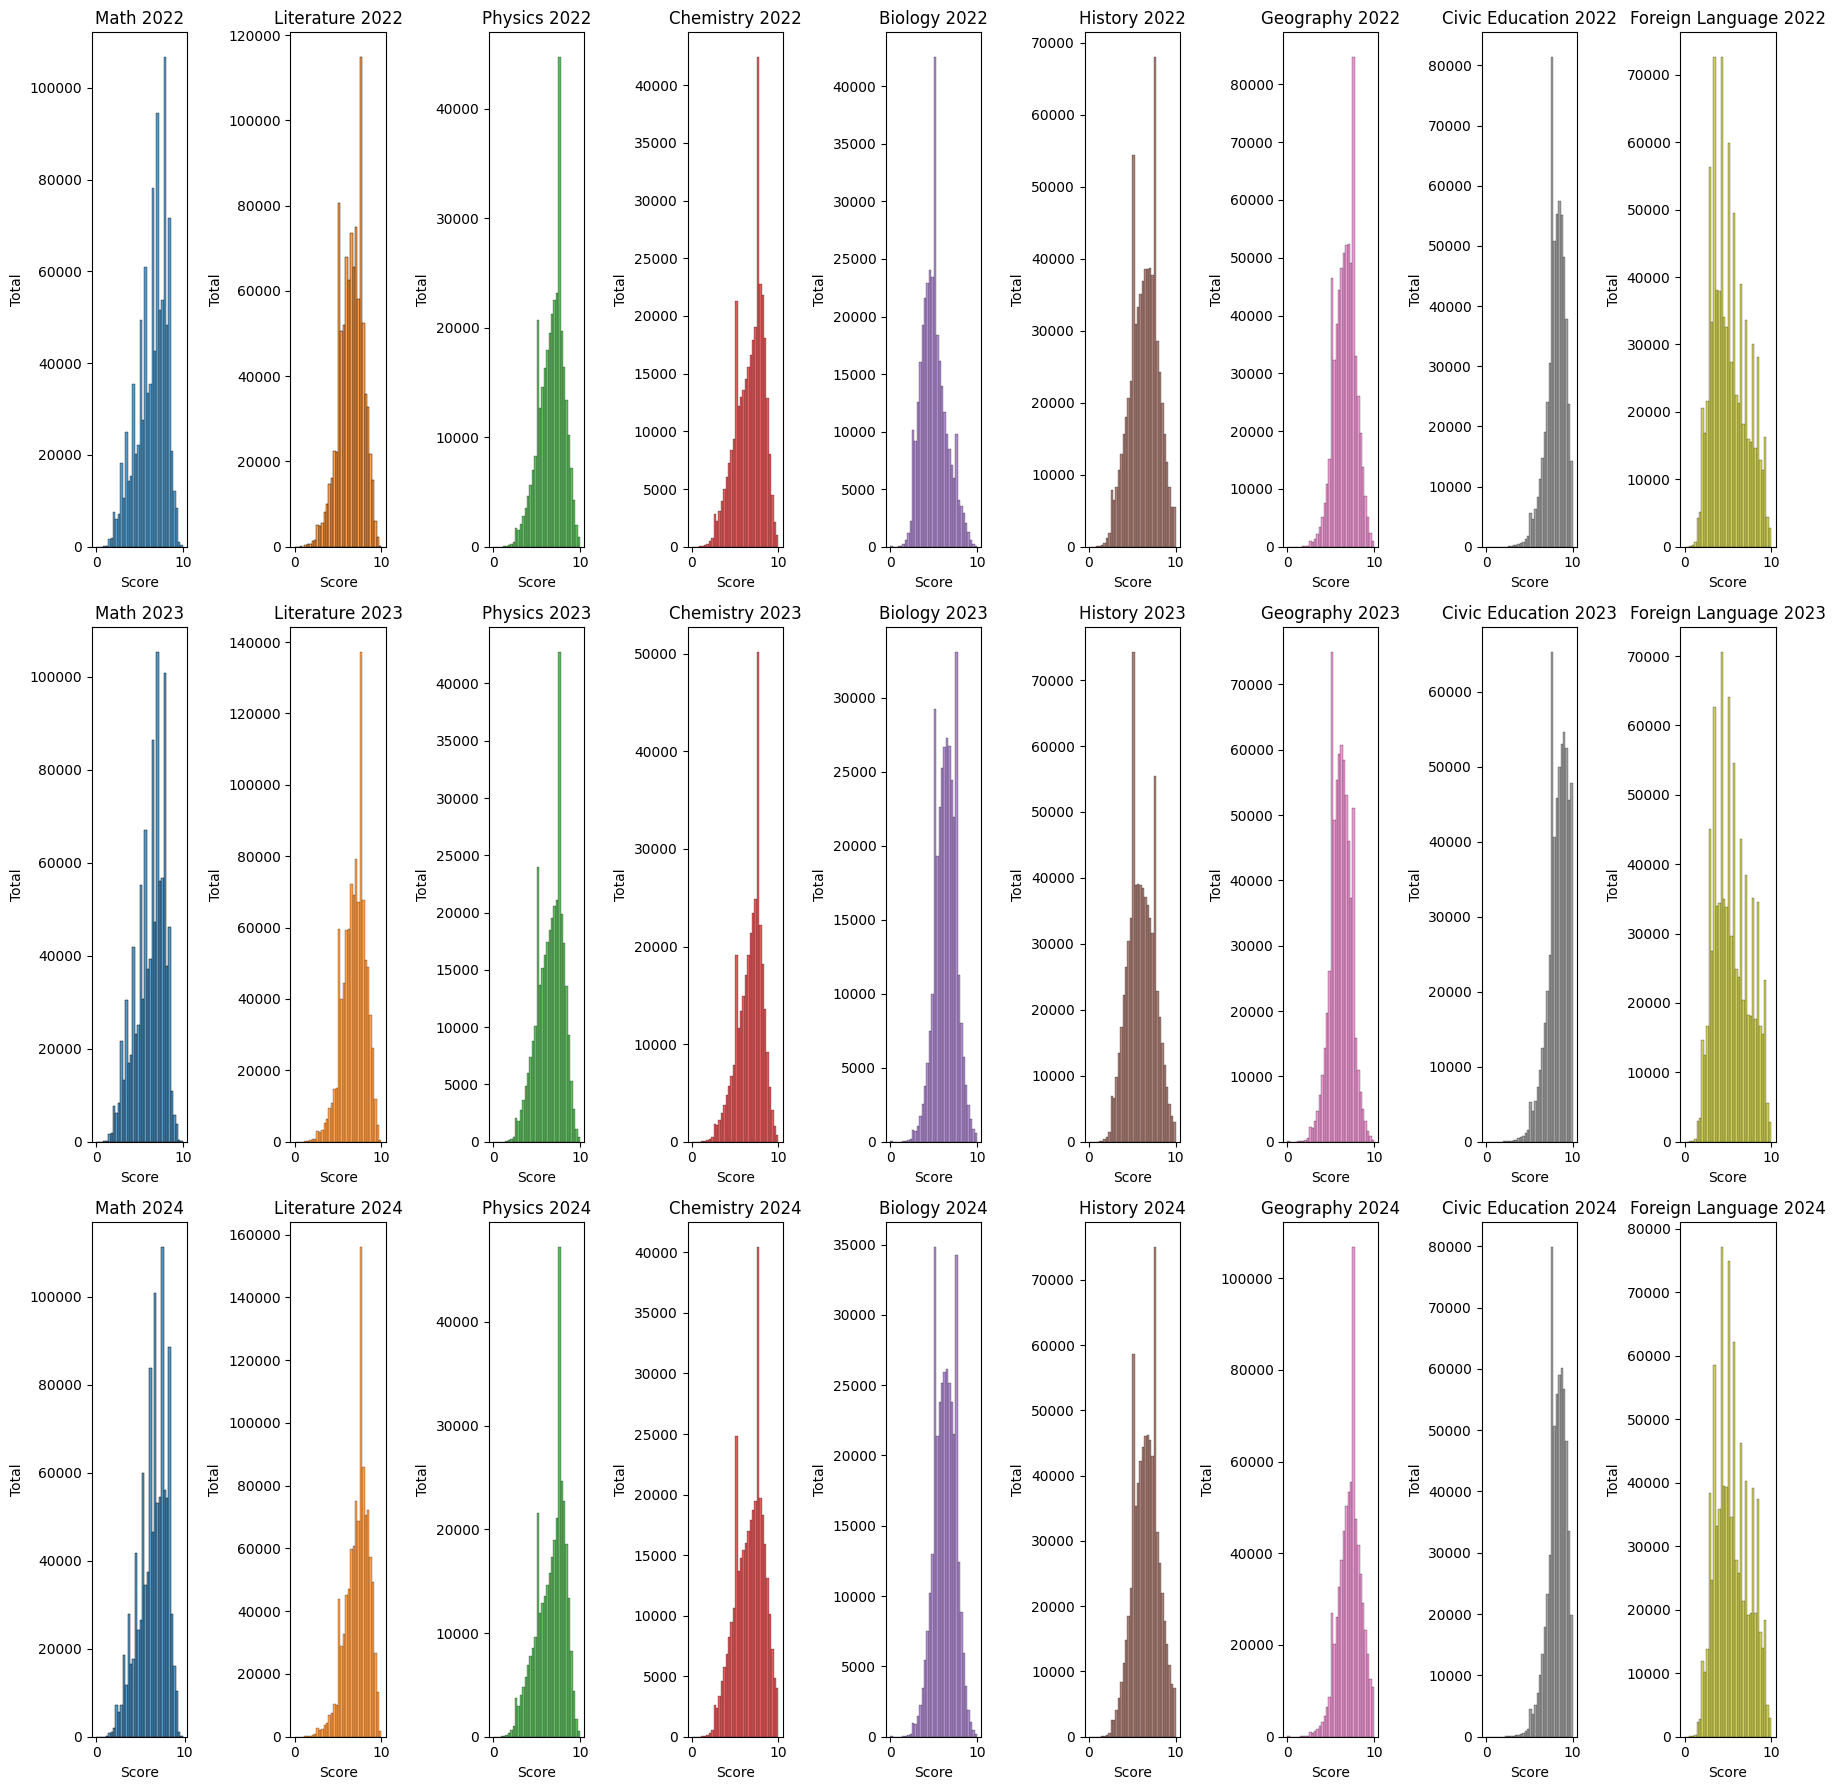

In [ ]:
# 3. the distribution of every subjects scores over 3 years
df2 = pd.read_csv('diem_thi_thpt_2022.csv')
df3 = pd.read_csv('diem_thi_thpt_2023.csv')
df4 = pd.read_csv('diem_thi_thpt_2024.csv')

subjects = ['Toán', 'Văn', 'Lý', 'Hoá', 'Sinh', 'Lịch Sử', 'Địa Lý', 'GDCD', 'Ngoại Ngữ']
years = ['2022', '2023', '2024']

subject_mapping = {
    'df2': {'Toán': 'toan', 'Văn': 'ngu_van', 'Lý': 'vat_li', 'Hoá': 'hoa_hoc', 'Sinh': 'sinh_hoc', 'Lịch Sử': 'lich_su', 'Địa Lý': 'dia_li', 'GDCD': 'gdcd', 'Ngoại Ngữ': 'ngoai_ngu'},
    'df3': {'Toán': 'toan', 'Văn': 'ngu_van', 'Lý': 'vat_li', 'Hoá': 'hoa_hoc', 'Sinh': 'sinh_hoc', 'Lịch Sử': 'lich_su', 'Địa Lý': 'dia_li', 'GDCD': 'gdcd', 'Ngoại Ngữ': 'ngoai_ngu'},
    'df4': {'Toán': 'toan', 'Văn': 'ngu_van', 'Lý': 'vat_li', 'Hoá': 'hoa_hoc', 'Sinh': 'sinh_hoc', 'Lịch Sử': 'lich_su', 'Địa Lý': 'dia_li', 'GDCD': 'gdcd', 'Ngoại Ngữ': 'ngoai_ngu'}
}


dfs = {'2022': df2, '2023': df3, '2024': df4}


subject_colors = {subject: f'C{i}' for i, subject in enumerate(subjects)}


plt.figure(figsize=(18, 18))


for i, subject in enumerate(subjects):
    for j, year in enumerate(years):
        df = dfs[year]
        df_key = f'df{j + 2}'
        column_name = subject_mapping[df_key].get(subject)
        if column_name in df.columns:
            plt.subplot(len(years), len(subjects), j * len(subjects) + i + 1)
            sns.histplot(df[column_name], kde=False, bins=36, color=subject_colors[subject])
            plt.title(f"{legend_translation.get(subject, subject)} {year}")
            plt.xlabel("Score")
            plt.ylabel("Total")
            plt.tight_layout()

plt.show()



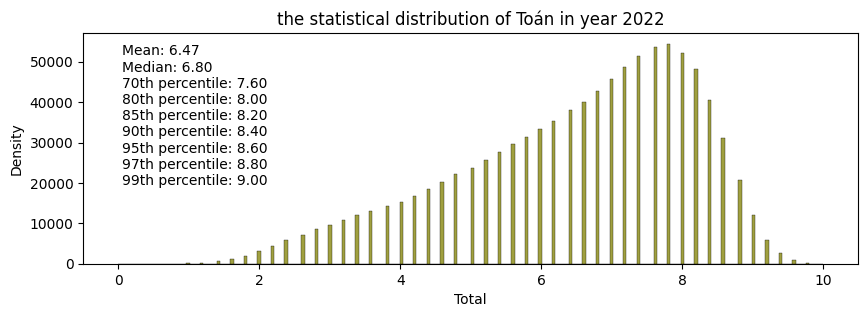

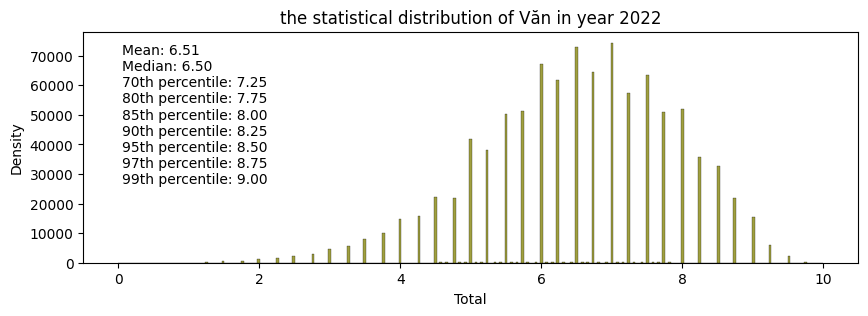

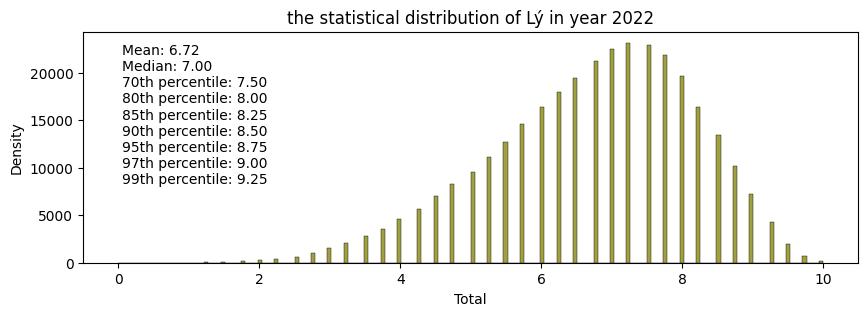

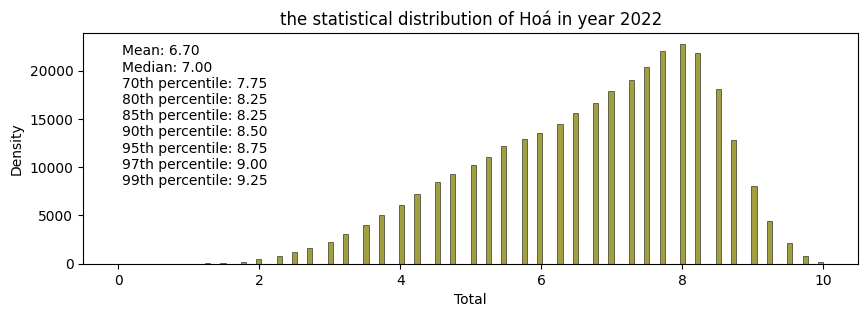

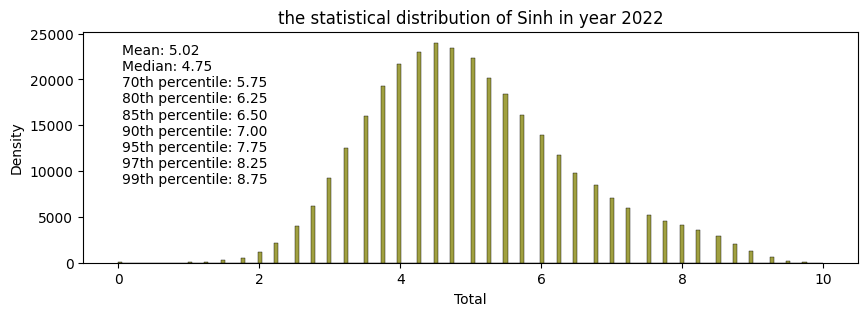

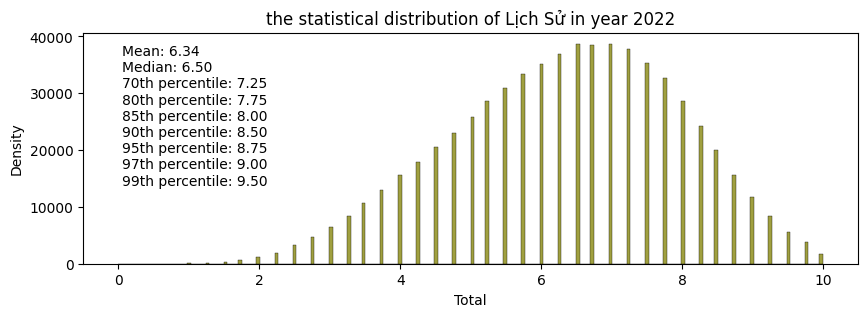

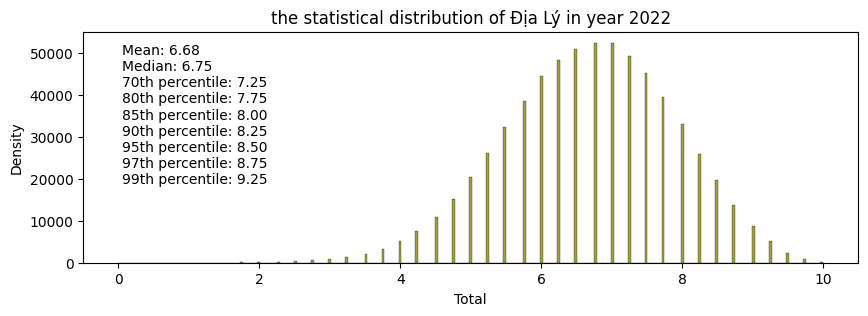

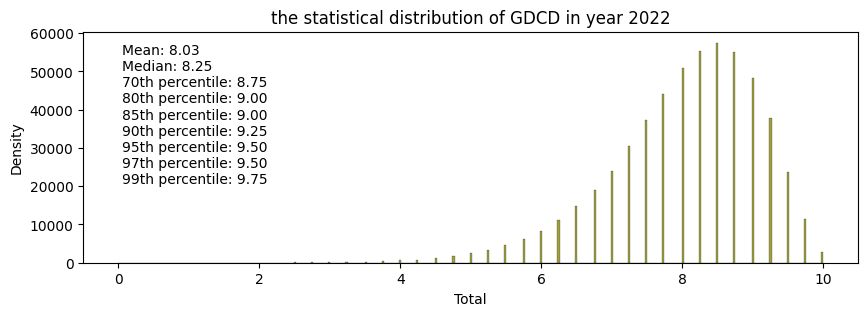

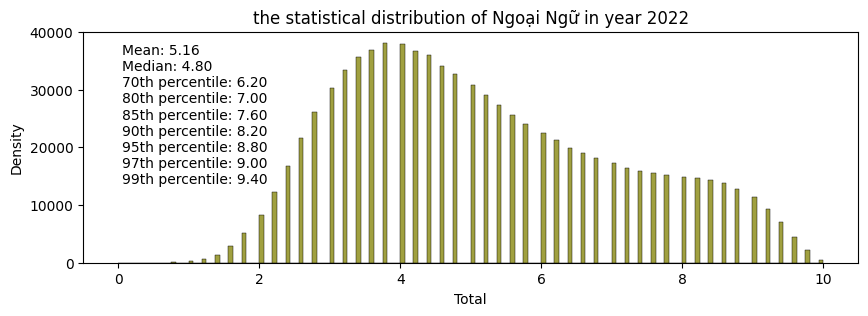

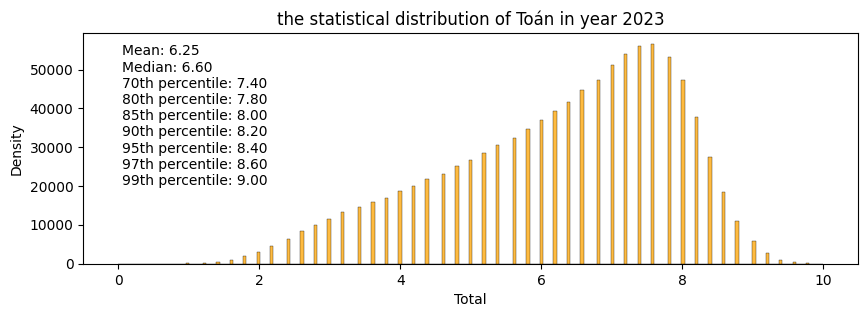

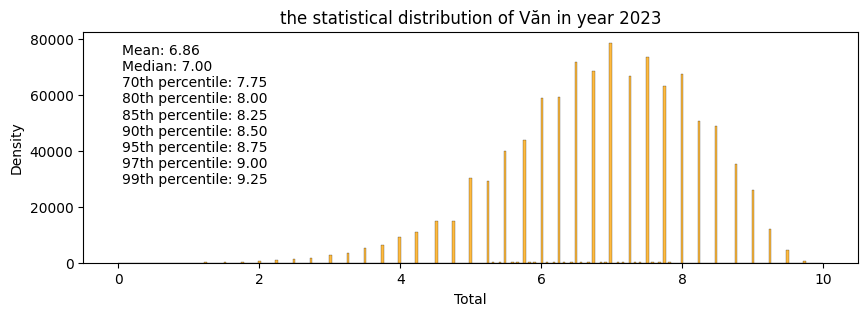

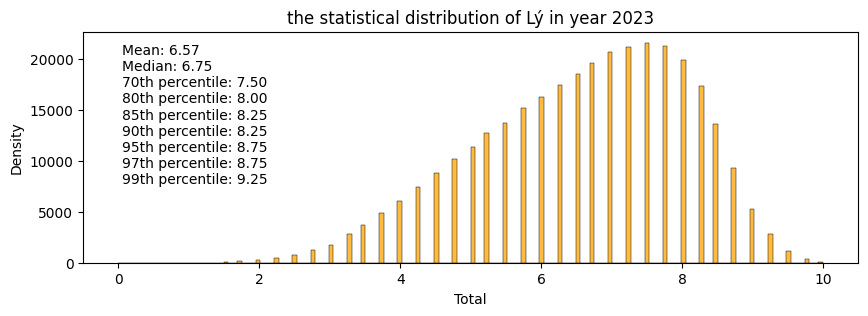

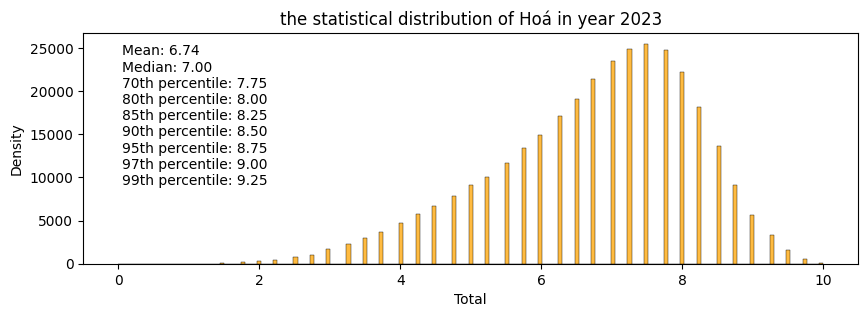

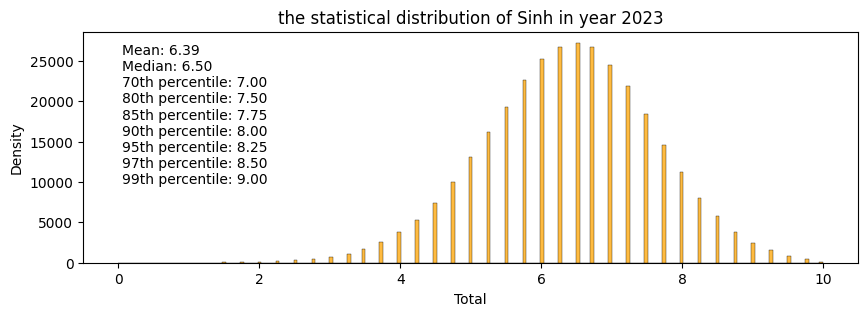

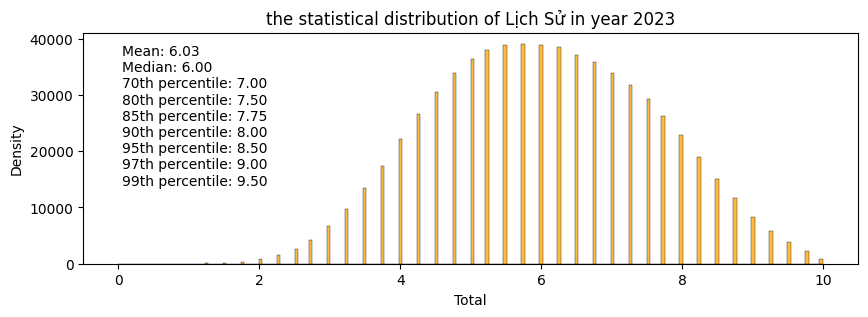

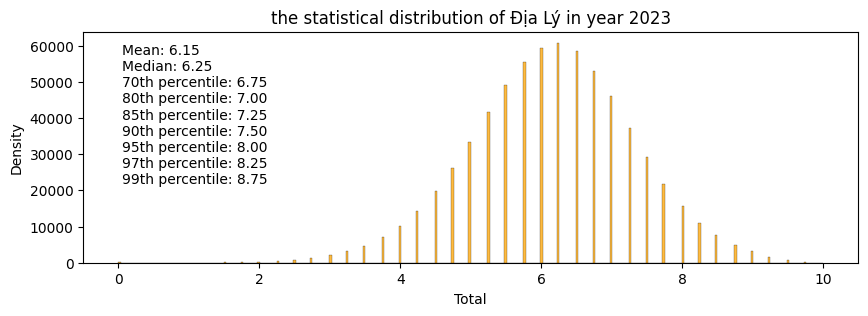

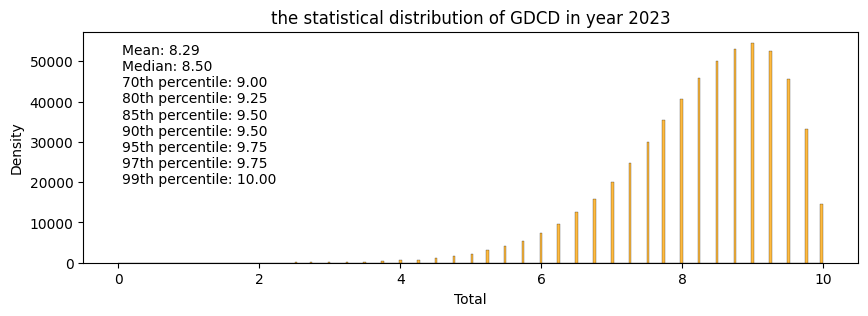

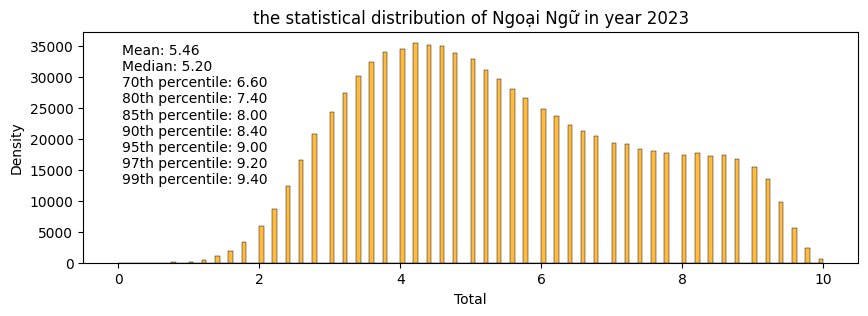

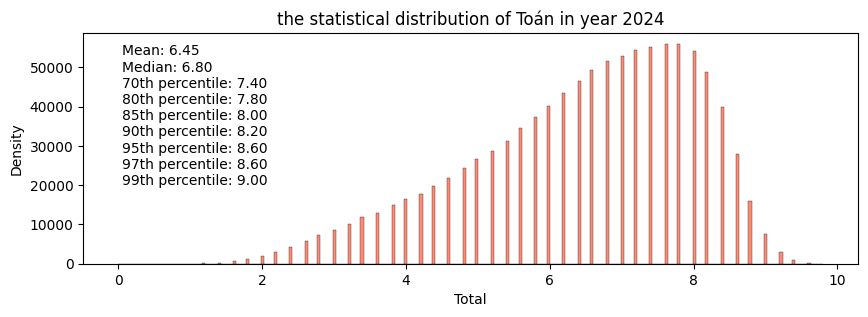

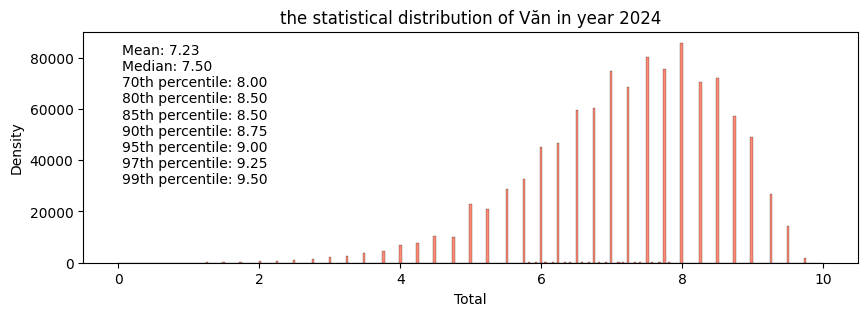

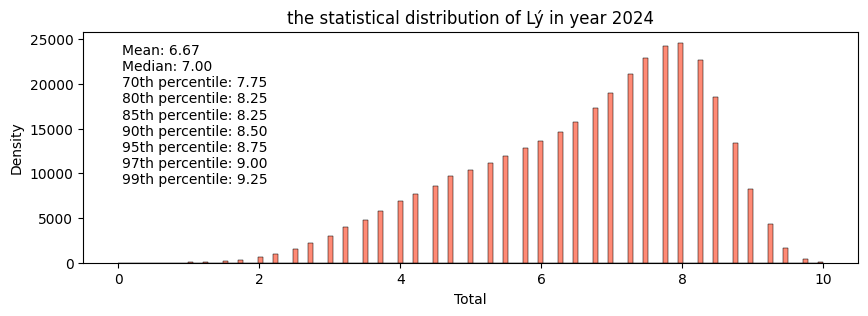

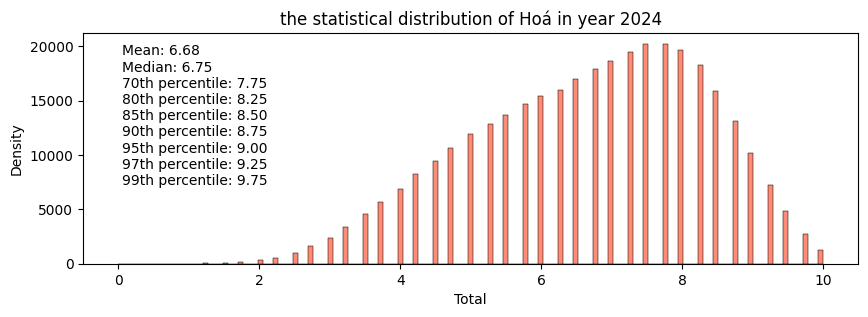

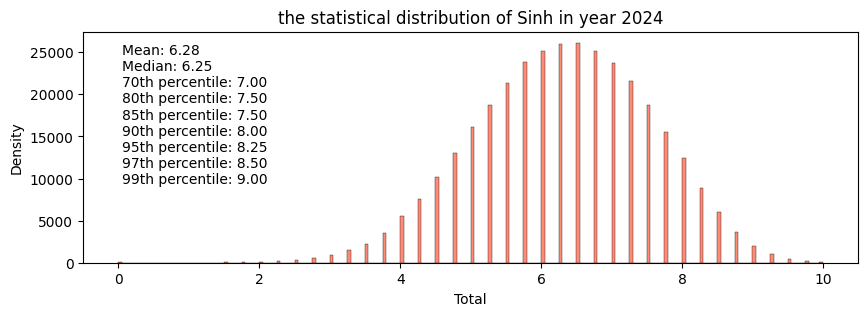

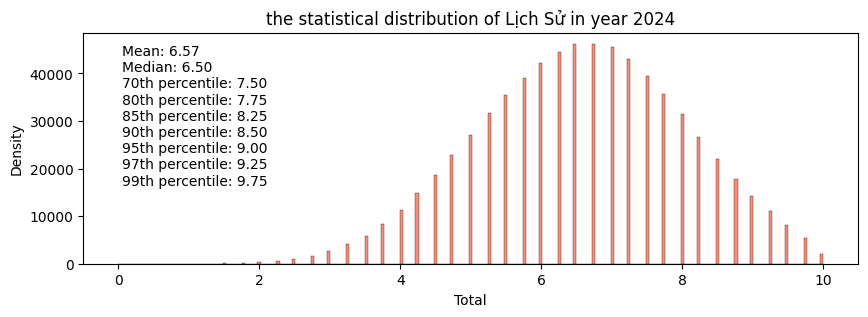

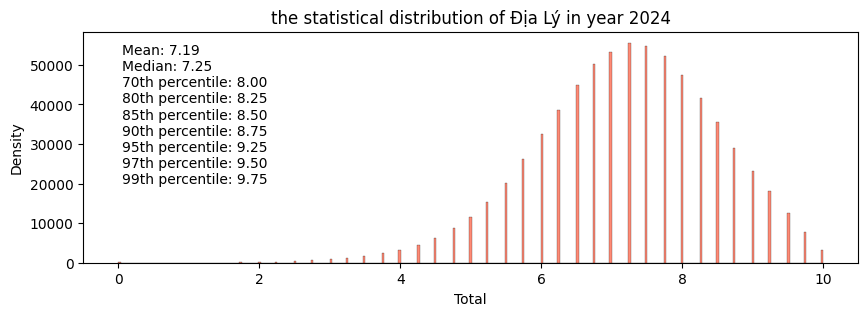

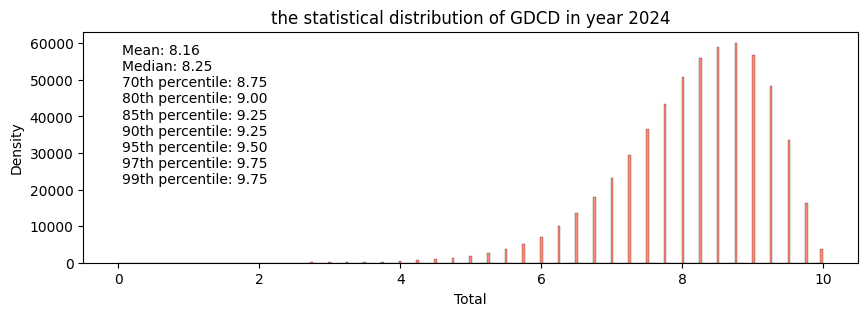

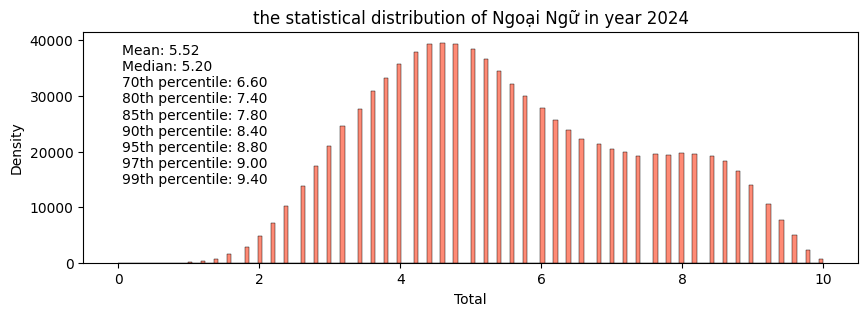

In [ ]:
# 4. the statistical distribution of every subjects in every years
for i, year in enumerate(years):
    for subject in subjects:
        plt.figure(figsize=(10, 3))
        data = dfs[str(year)][dfs[str(year)][subject_mapping[f'df{i + 2}' ].get(subject)].notna()][subject_mapping[f'df{i + 2}' ].get(subject)].dropna()
        sns.histplot(data, color=colors[i])
        plt.title(f"the statistical distribution of {subject} in year {year}")
        plt.xlabel('Total')
        plt.ylabel('Density')

        mean = np.mean(data)
        median = np.median(data)
        percentiles = {
            70: np.percentile(data, 70),
            80: np.percentile(data, 80),
            85: np.percentile(data, 85),
            90: np.percentile(data, 90),
            95: np.percentile(data, 95),
            97: np.percentile(data, 97),
            99: np.percentile(data, 99)
        }

        text_str = f"Mean: {mean:.2f}\nMedian: {median:.2f}"
        for p, value in percentiles.items():
            text_str += f"\n{p}th percentile: {value:.2f}"
        plt.text(0.05, 0.95, text_str, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
        plt.show()

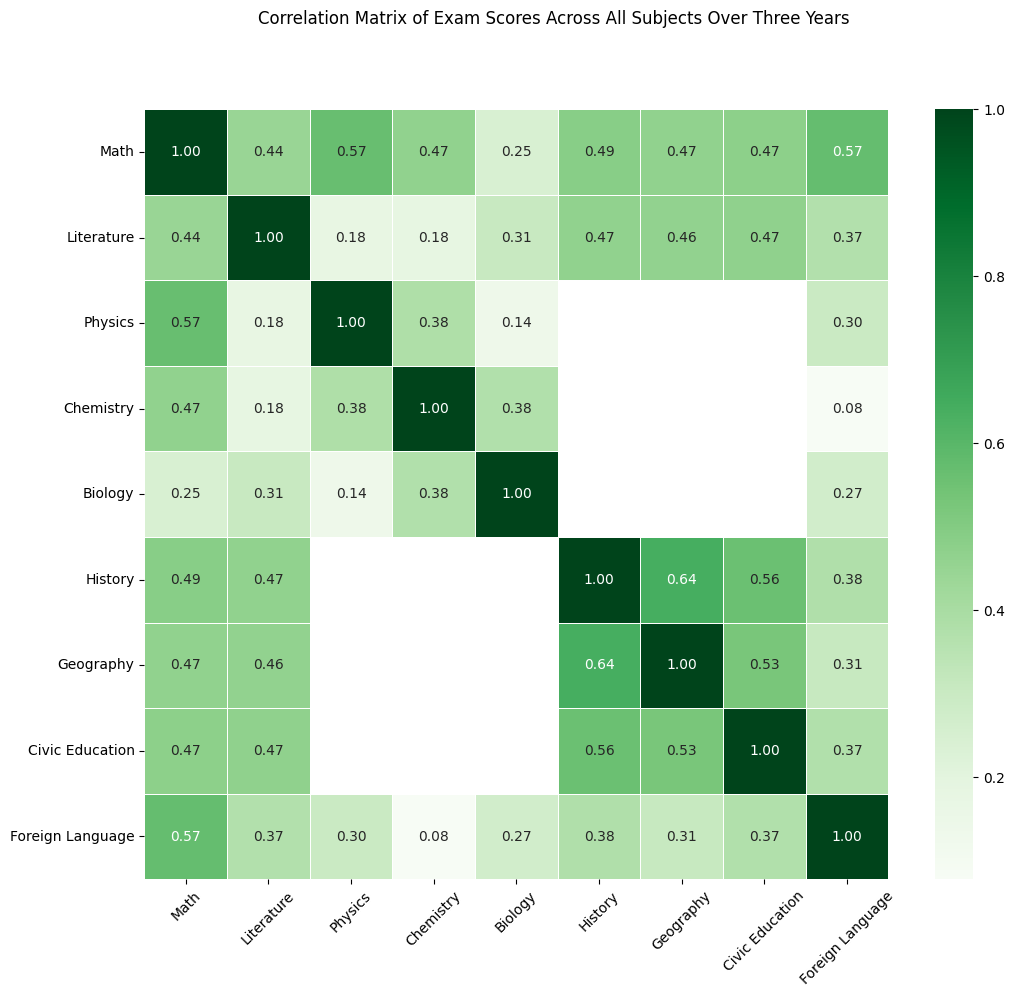

In [ ]:

# 5. Correlation Matrix of subject Scores Across All Subjects Over Three Years
dfs = {'2022': df2, '2023': df3, '2024': df4}


all_df = pd.concat([dfs['2022'].assign(year=2022),
                    dfs['2023'].assign(year=2023),
                    dfs['2024'].assign(year=2024)], ignore_index=True)
subjects_to_correlate = ['toan', 'ngu_van', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd', 'ngoai_ngu']
correlation_matrix = all_df[subjects_to_correlate].corr()


vn_to_en = {
    'toan': 'Math',
    'ngu_van': 'Literature',
    'vat_li': 'Physics',
    'hoa_hoc': 'Chemistry',
    'sinh_hoc': 'Biology',
    'lich_su': 'History',
    'dia_li': 'Geography',
    'gdcd': 'Civic Education',
    'ngoai_ngu': 'Foreign Language'
}

plt.figure(figsize=(12, 10))
ax = sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='Greens',
    fmt=".2f",
    linewidths=.5,

    xticklabels=[vn_to_en.get(col, col) for col in subjects_to_correlate],
    yticklabels=[vn_to_en.get(col, col) for col in subjects_to_correlate]
)

plt.xticks(rotation=45)
plt.title("Correlation Matrix of Exam Scores Across All Subjects Over Three Years", y=1.1, x=0.55)
plt.show()

The Graph: The heatmap visualizes correlations between subject scores on the Vietnamese National College Entrance Exam from 2022-2024. Darker green indicates stronger positive correlations.

Examples:

- Strong Positive: Math and Physics might have a strong positive correlation, meaning students doing well in one tend to do well in the other.
- Moderate Positive: Literature and Foreign Language could have a moderate positive correlation, showing a less strong but still positive relationship.
- Weak/No Correlation: History and Biology might have a weak or no correlation, suggesting little relationship between performance in these subjects.

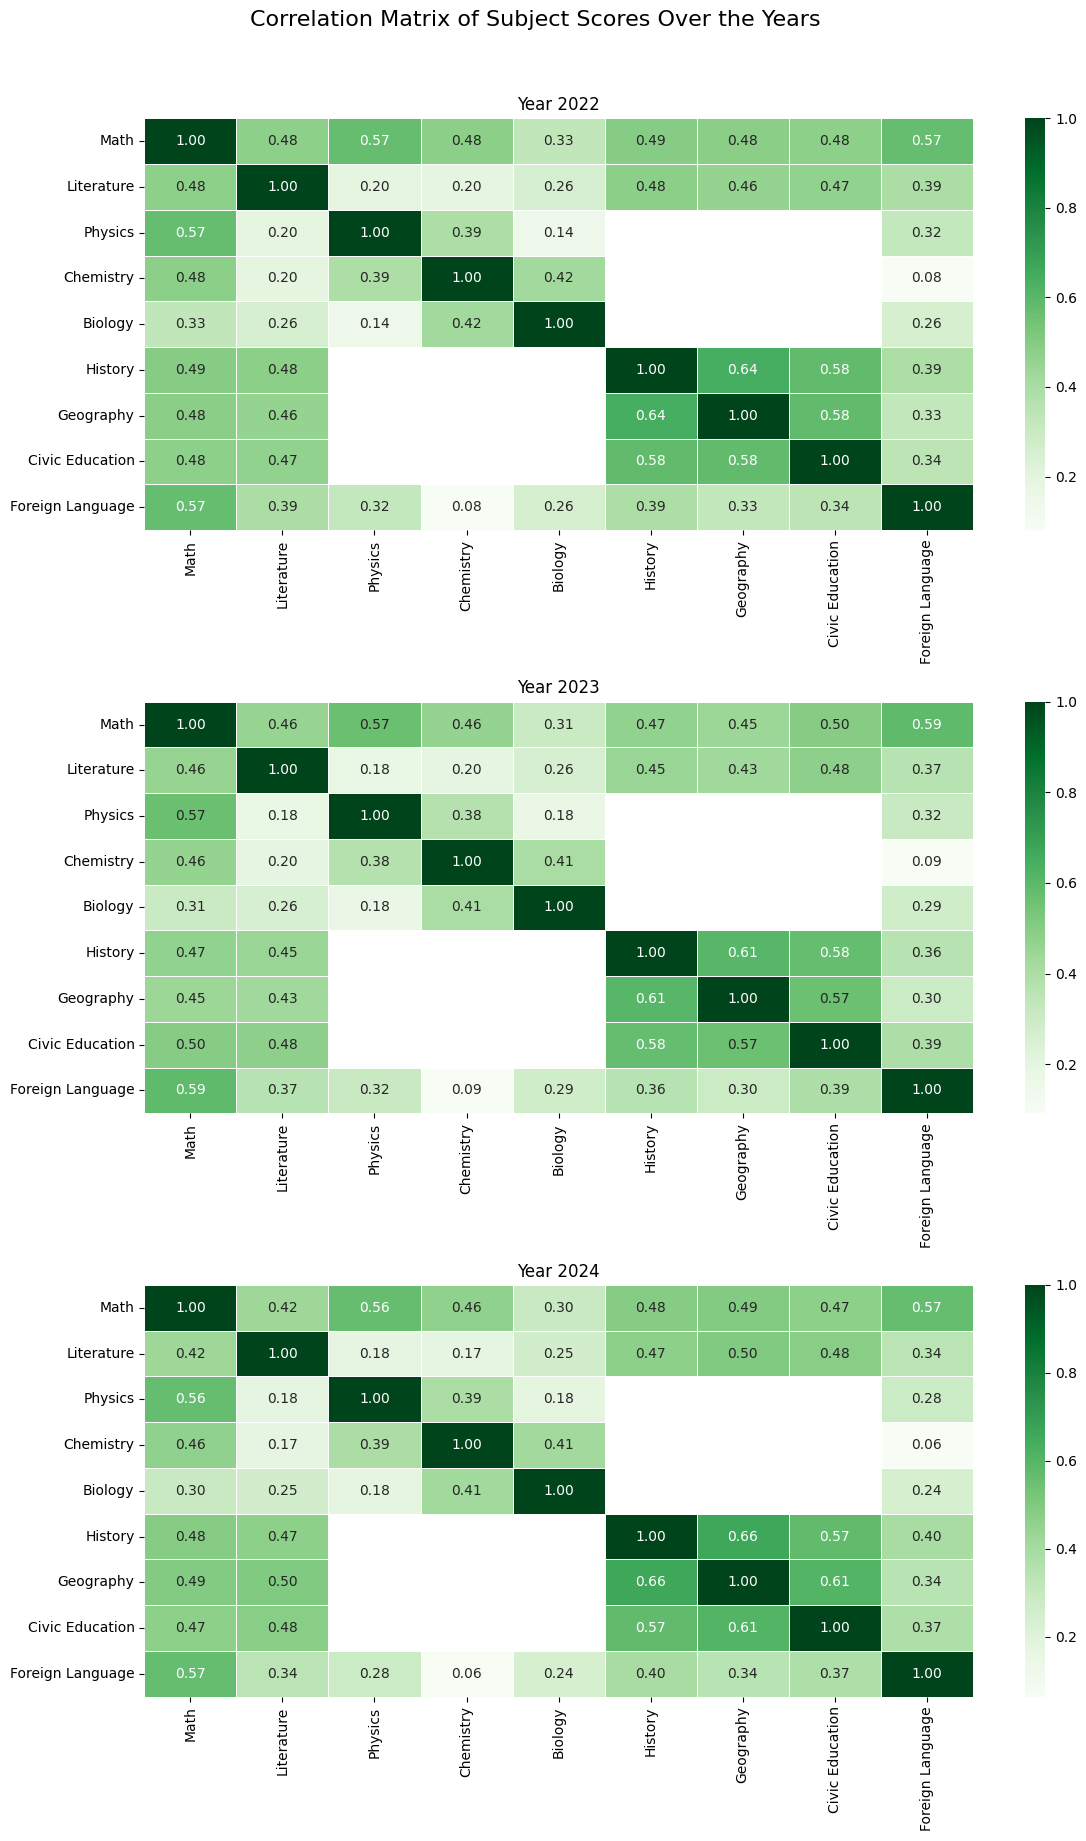

In [ ]:
# 6.Correlation Matrix of subject Scores Across All Subjects Over Three Years

subjects_to_correlate = ['toan', 'ngu_van', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd', 'ngoai_ngu']


dfs = {'2022': df2, '2023': df3, '2024': df4}


all_df = pd.concat([dfs['2022'].assign(year=2022),
                    dfs['2023'].assign(year=2023),
                    dfs['2024'].assign(year=2024)], ignore_index=True)


vn_to_en = {
    'toan': 'Math',
    'ngu_van': 'Literature',
    'vat_li': 'Physics',
    'hoa_hoc': 'Chemistry',
    'sinh_hoc': 'Biology',
    'lich_su': 'History',
    'dia_li': 'Geography',
    'gdcd': 'Civic Education',
    'ngoai_ngu': 'Foreign Language'
}

fig, axes = plt.subplots(3, 1, figsize=(12, 18))
fig.suptitle("Correlation Matrix of Subject Scores Over the Years", fontsize=16, y=1.02, x=0.45)

years = [2022, 2023, 2024]

for i, year in enumerate(years):
    year_data = all_df[all_df['year'] == year][subjects_to_correlate]
    correlation_matrix = year_data.corr()
    ax = axes[i]
    sns.heatmap(correlation_matrix,
                annot=True,
                cmap='Greens',
                fmt=".2f",
                linewidths=.5,
                ax=ax,
                xticklabels=[vn_to_en.get(col, col) for col in subjects_to_correlate],
                yticklabels=[vn_to_en.get(col, col) for col in subjects_to_correlate]
               )

    ax.set_title(f"Year {year}")

plt.tight_layout()
plt.show()



part 3: about Social and Natural Science group:

7. percent of Candidates Participating in each group every years

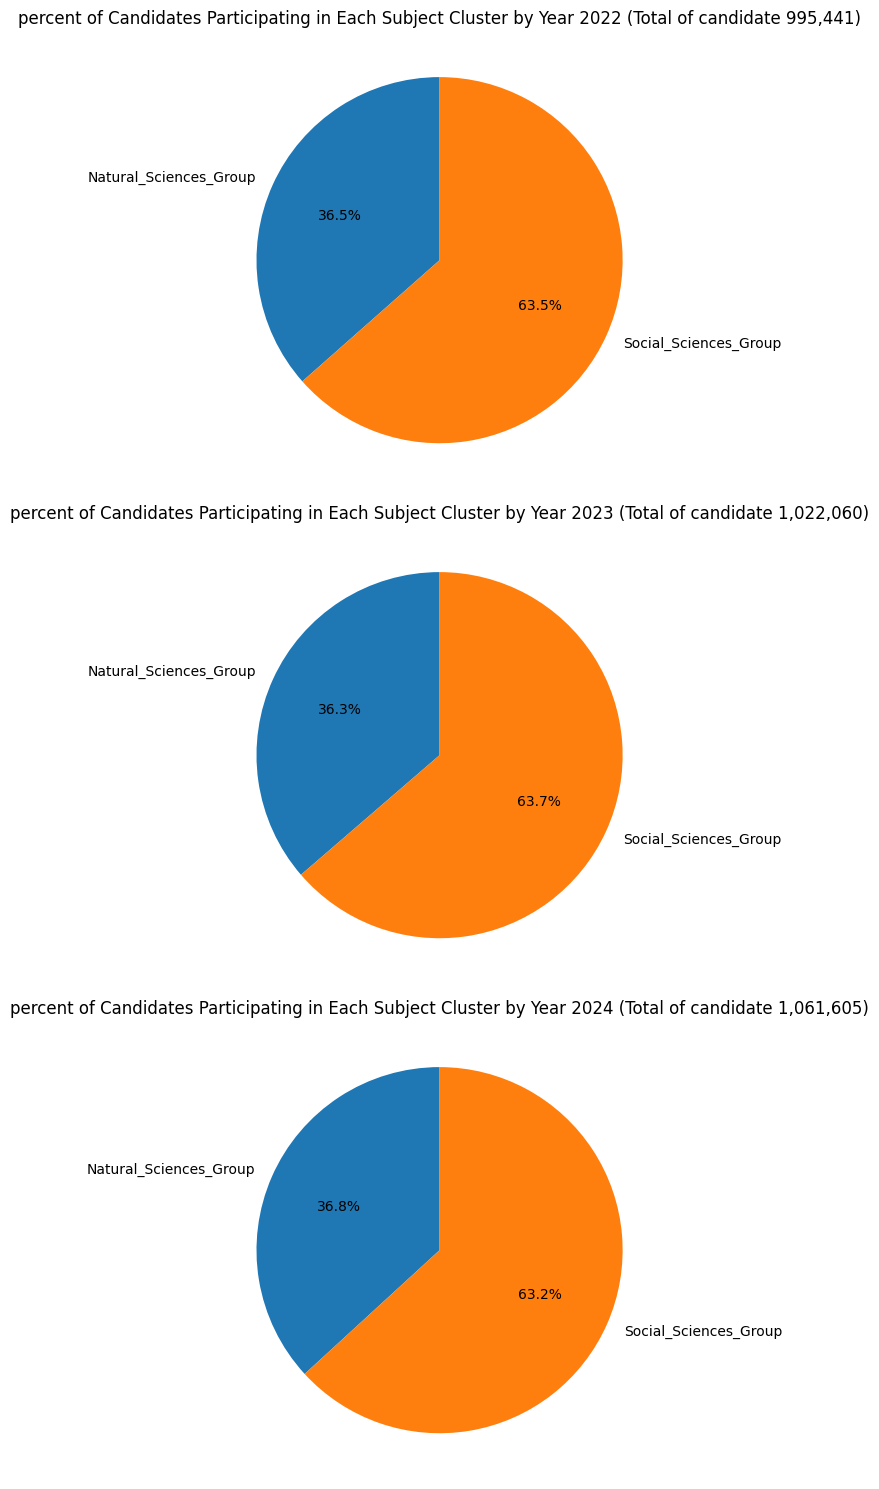

In [ ]:
# 7. percent of Candidates Participating in each group every years
dfs = {'2022': df2, '2023': df3, '2024': df4}


all_df = pd.concat([dfs['2022'].assign(year=2022),
                    dfs['2023'].assign(year=2023),
                    dfs['2024'].assign(year=2024)], ignore_index=True)

all_df['Natural_Sciences_Group'] = all_df['sinh_hoc'] + all_df['vat_li'] + all_df['hoa_hoc']
all_df['Social_Sciences_Group'] = all_df ['lich_su'] + all_df['dia_li'] + all_df['gdcd']
fig, ax = plt.subplots(3, 1, figsize=(10, 15))
years = ['2022', '2023', '2024']
all_combination_of_Science_Group = ['Natural_Sciences_Group', 'Social_Sciences_Group']

for i, year in enumerate(years):
    total_candidates_year = len(all_df[all_df['year'] == int(year)])
    Science_group_value = []
    for Science_Group in all_combination_of_Science_Group:
        data = all_df[all_df['year'] == int(year)][Science_Group].dropna()
        Science_group_value.append(len(data))
    ax[i].pie(Science_group_value, labels=all_combination_of_Science_Group, autopct='%1.1f%%', startangle=90)
    ax[i].set_title(f'percent of Candidates Participating in Each Subject Cluster by Year {year} (Total of candidate {total_candidates_year:,})')
plt.tight_layout()
plt.show()

part 4: about cluster

8. Score Distribution of Subject Cluster from 2022 to 2024
9. statistical measures of questions 7.
10. Correlation Matrix of Subject Cluster Scores over Three years
11. Correlation Matrix of Subject Cluster Scores over each year

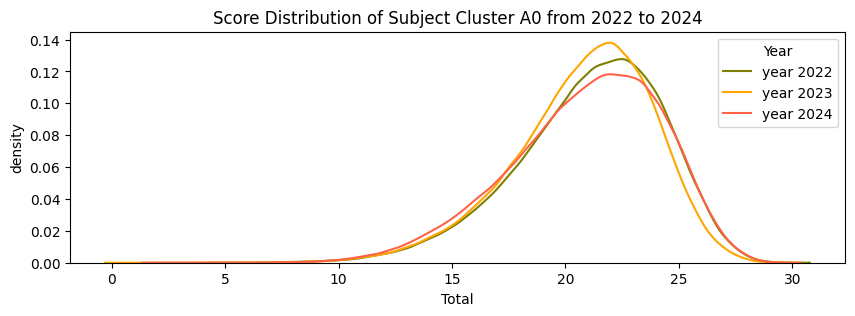

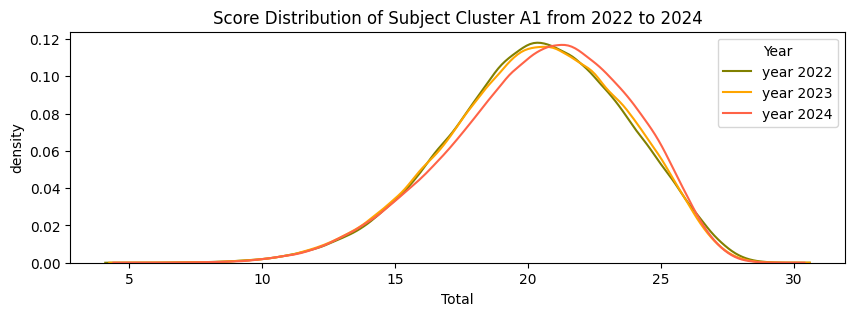

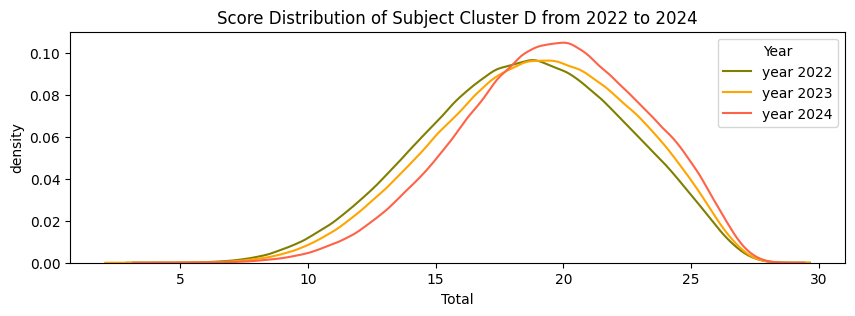

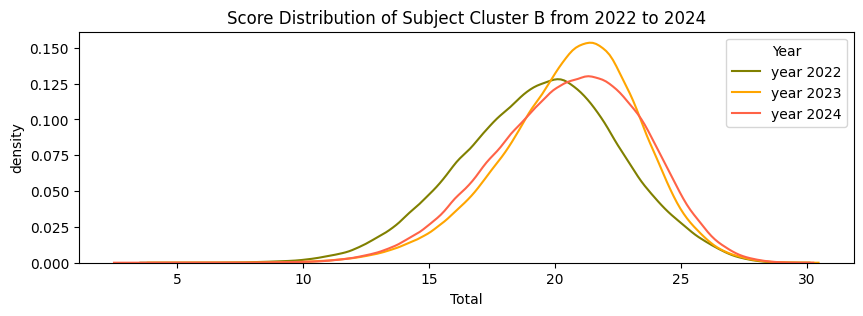

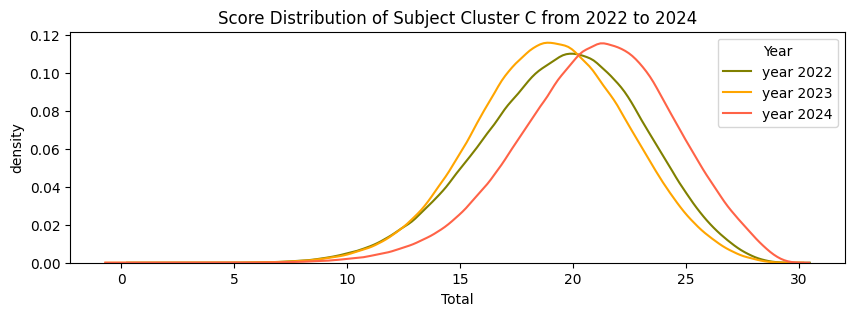

In [ ]:
# 8. Score Distribution of Subject Cluster from 2022 to 2024

dfs = {'2022': df2, '2023': df3, '2024': df4}


all_df = pd.concat([dfs['2022'].assign(year=2022),
                    dfs['2023'].assign(year=2023),
                    dfs['2024'].assign(year=2024)], ignore_index=True)


all_df.drop(columns='ma_ngoai_ngu', inplace=True)


all_df['A0'] = all_df['toan'] + all_df['vat_li'] + all_df['hoa_hoc']
all_df['A1'] = all_df['toan'] + all_df['vat_li'] + all_df['ngoai_ngu']
all_df['D'] = all_df['toan'] + all_df['ngu_van'] + all_df['ngoai_ngu']
all_df['B'] = all_df['toan'] + all_df['hoa_hoc'] + all_df['sinh_hoc']
all_df['C'] = all_df['ngu_van'] + all_df['lich_su'] + all_df['dia_li']

every_combination = ['A0', 'A1', 'D', 'B', 'C']


colors = ['olive', 'orange', 'tomato']

years = ['2022', '2023', '2024']

for combo in every_combination:
    plt.figure(figsize=(10, 3))
    for year, combo_color in zip(years, colors):
        data = all_df[all_df['year'] == int(year)][combo].dropna()
        sns.kdeplot(data, label=f'year {year}', color=combo_color)
        plt.title(f'Score Distribution of Subject Cluster {combo} from 2022 to 2024')
        plt.xlabel('Total')
        plt.ylabel('density')
        plt.legend(title="Year")
        plt.grid(False)
    plt.show()



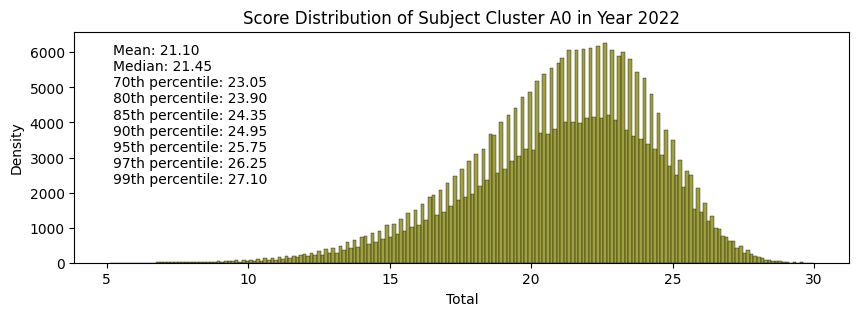

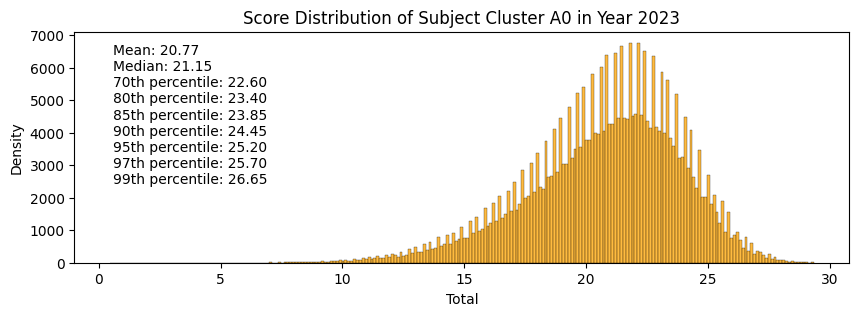

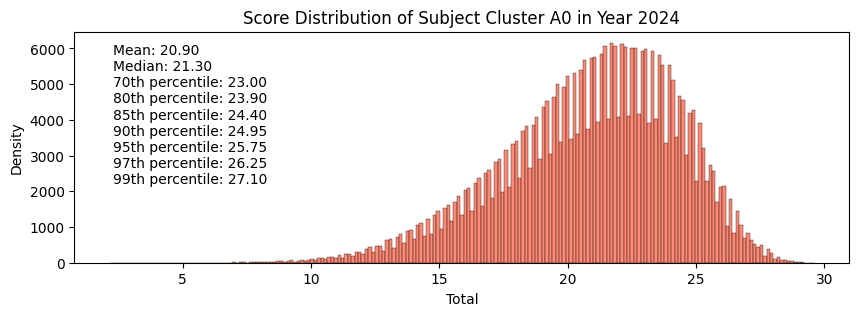

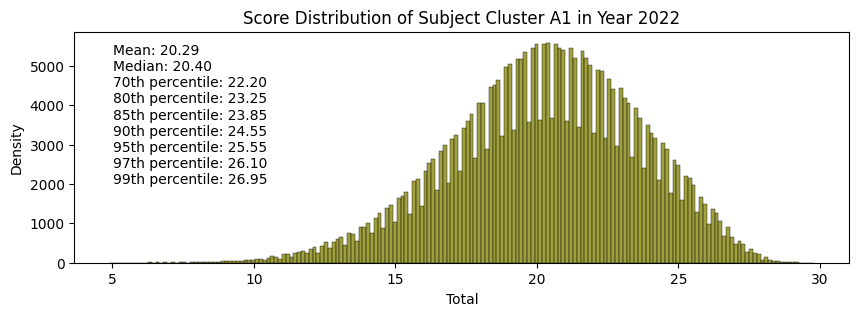

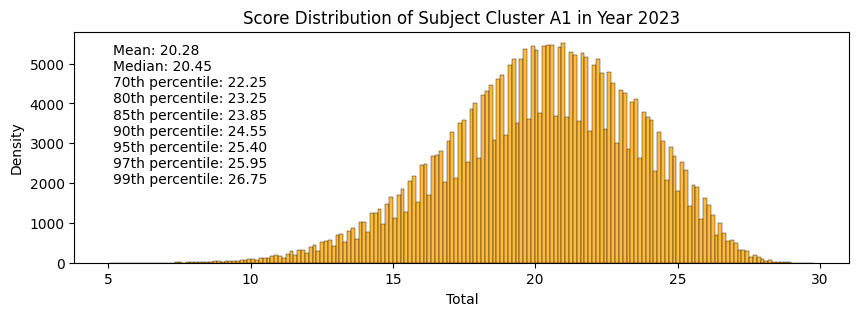

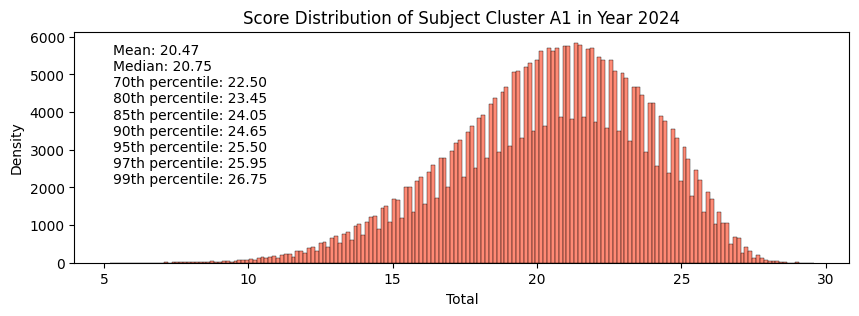

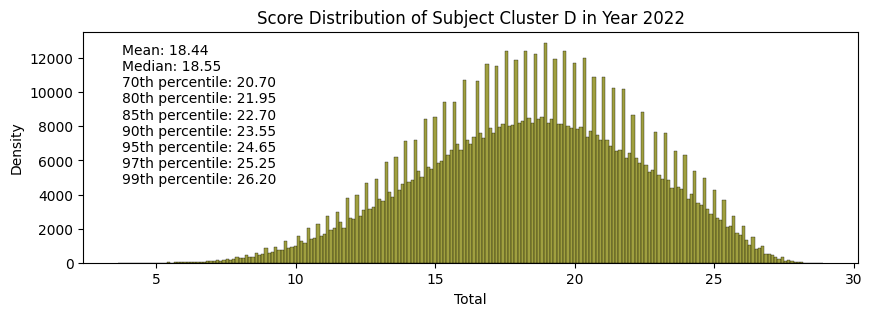

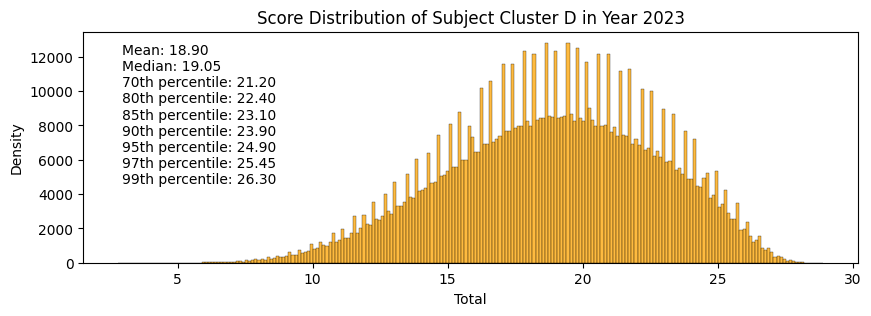

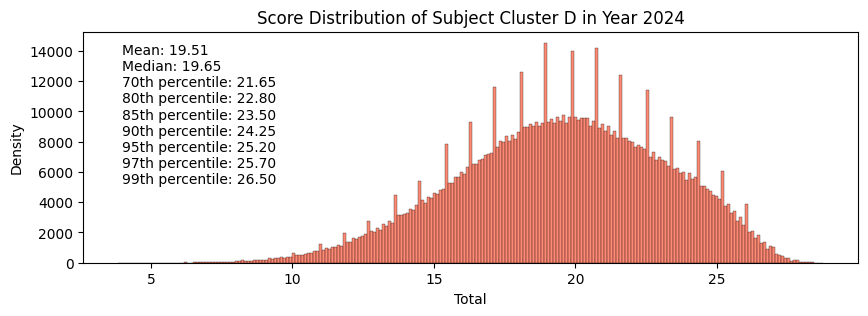

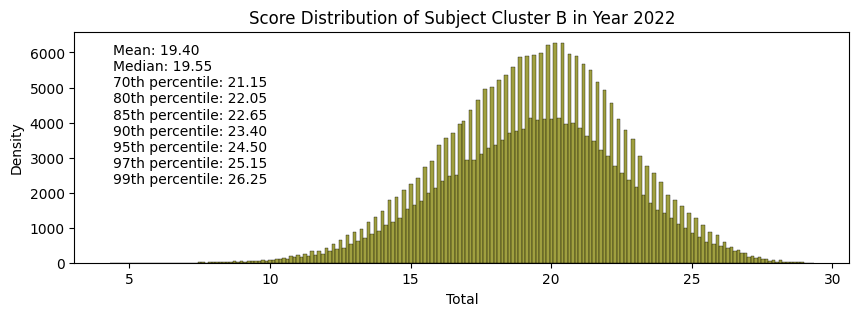

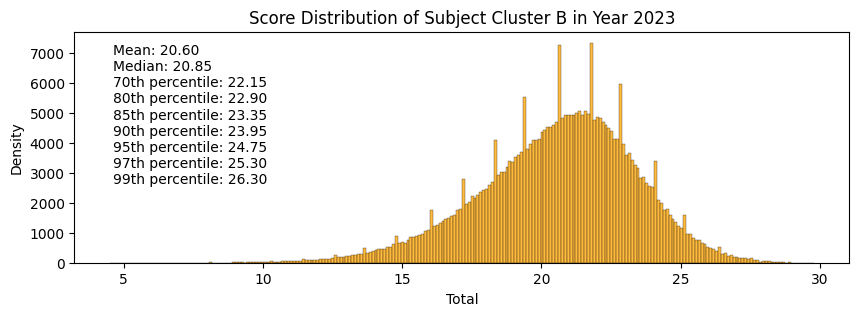

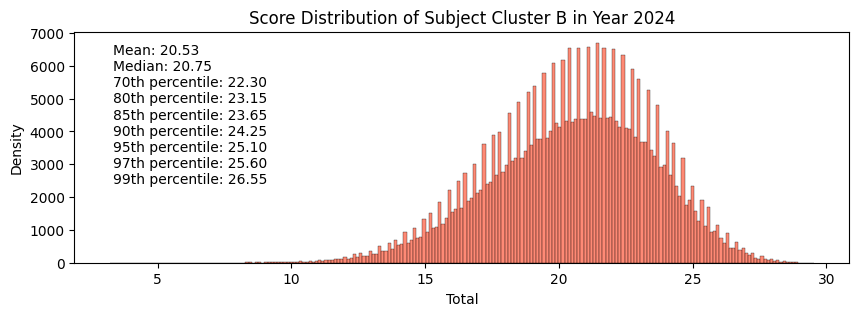

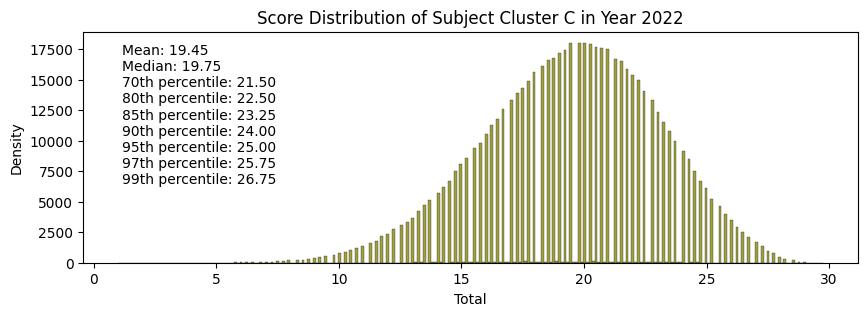

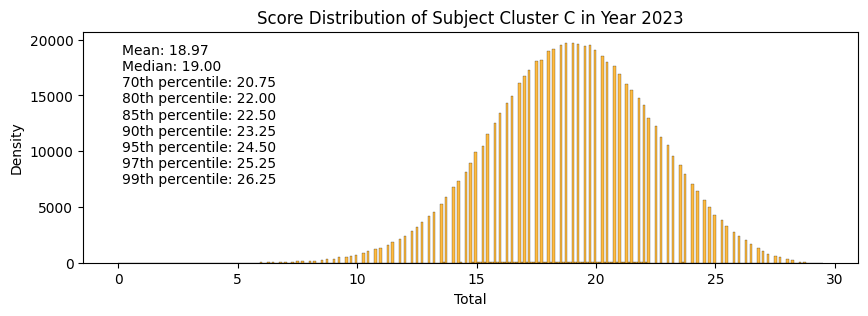

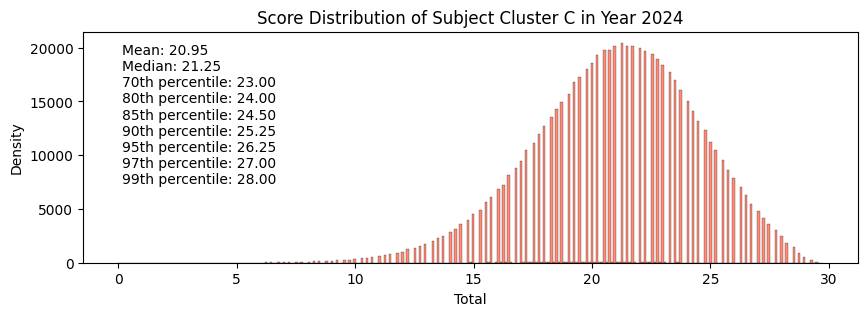

In [ ]:
# 9. statistical measures of questions 7.

for combo in every_combination:
  for year, color in zip(years, colors):
    plt.figure(figsize=(10, 3))
    data  = all_df[all_df['year'] == int(year)][combo].dropna()
    sns.histplot(data, color=color)

    plt.title(f"Score Distribution of Subject Cluster {combo} in Year {year}")
    plt.xlabel('Total')
    plt.ylabel('Density')
    mean = np.mean(data)
    median = np.median(data)

    percentiles = {
        70: np.percentile(data, 70),
        80: np.percentile(data, 80),
        85: np.percentile(data, 85),
        90: np.percentile(data, 90),
        95: np.percentile(data, 95),
        97: np.percentile(data, 97),
        99: np.percentile(data, 99)
    }

    text_str = f"Mean: {mean:.2f}\nMedian: {median:.2f}"
    for p, value in percentiles.items():
        text_str += f"\n{p}th percentile: {value:.2f}"
    plt.text(0.05, 0.95, text_str, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
    plt.show()

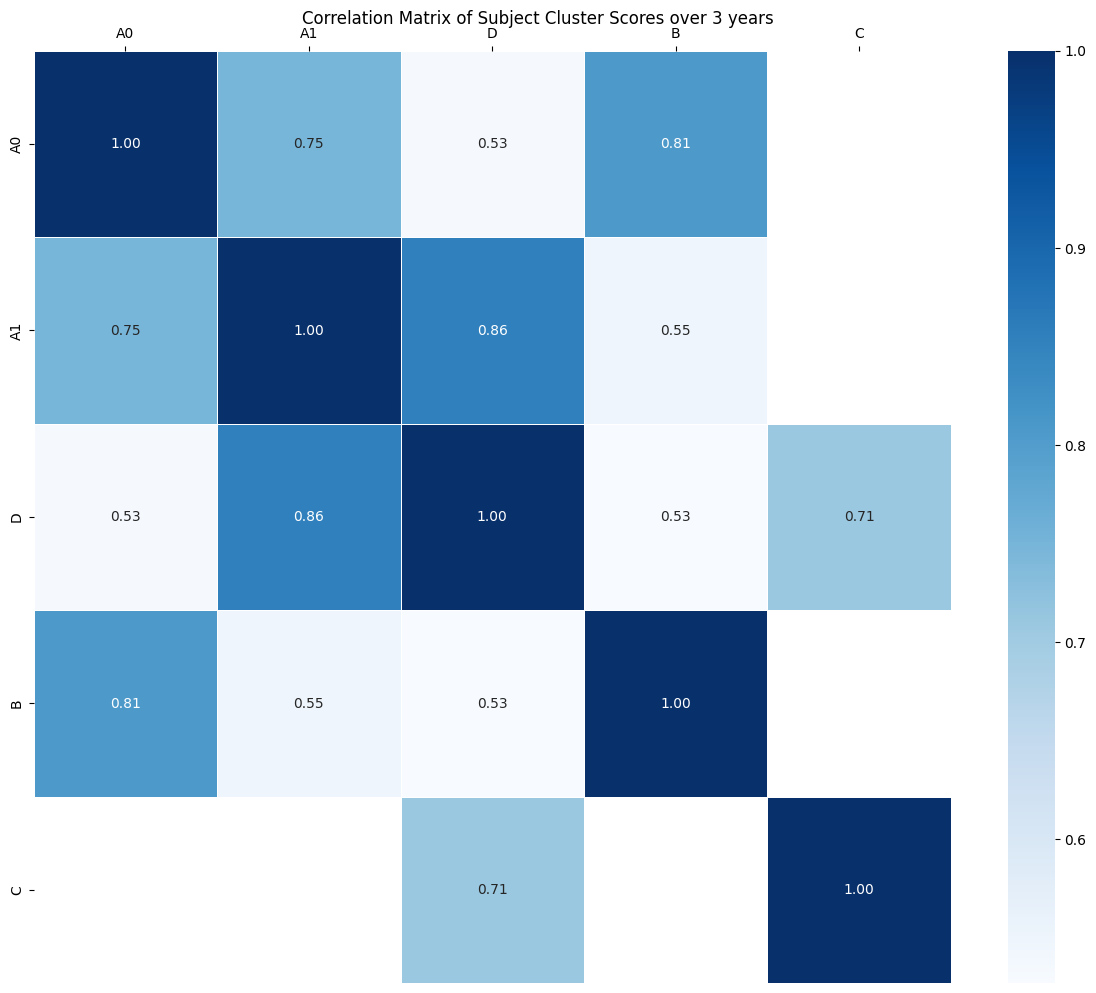

In [ ]:
# 10. Correlation Matrix of Subject Cluster Scores over Three years

Combination_to_Correlate = ['A0', 'A1', 'D', 'B', 'C']
fig, axes = plt.subplots(1,1, figsize=(12, 10))
correlation_matrix = all_df[Combination_to_Correlate].corr()
ax = axes
sns.heatmap(correlation_matrix, annot=True, cmap= 'Blues', fmt=".2f",
            linewidths=.5, ax=ax)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.title("Correlation Matrix of Subject Cluster Scores over 3 years", y = 1.02, x = 0.55)
plt.tight_layout()
plt.show()

EXPLANATION


The Graph: The heatmap visualizes correlations between different subject cluster scores on the Vietnamese National College Entrance Exam from 2022-2024. Darker blue indicates stronger positive correlations.

Subject Clusters: Remember, subject clusters represent combinations of subjects (e.g., A0 = Math, Physics, Chemistry).

Examples:

- Strong Positive: Clusters A0 (Math, Physics, Chemistry) and A1 (Math, Physics, Foreign Language) might have a strong positive correlation, meaning students scoring well in one cluster tend to score well in the other.
- Moderate Positive: Cluster D (Math, Literature, Foreign Language) could have a moderate positive correlation with A1, showing a less strong but still positive relationship.
- Weak/No Correlation: Clusters B (Math, Chemistry, Biology) and C (Literature, History, Geography) might have a weak or no correlation, suggesting little relationship between performance in these clusters.

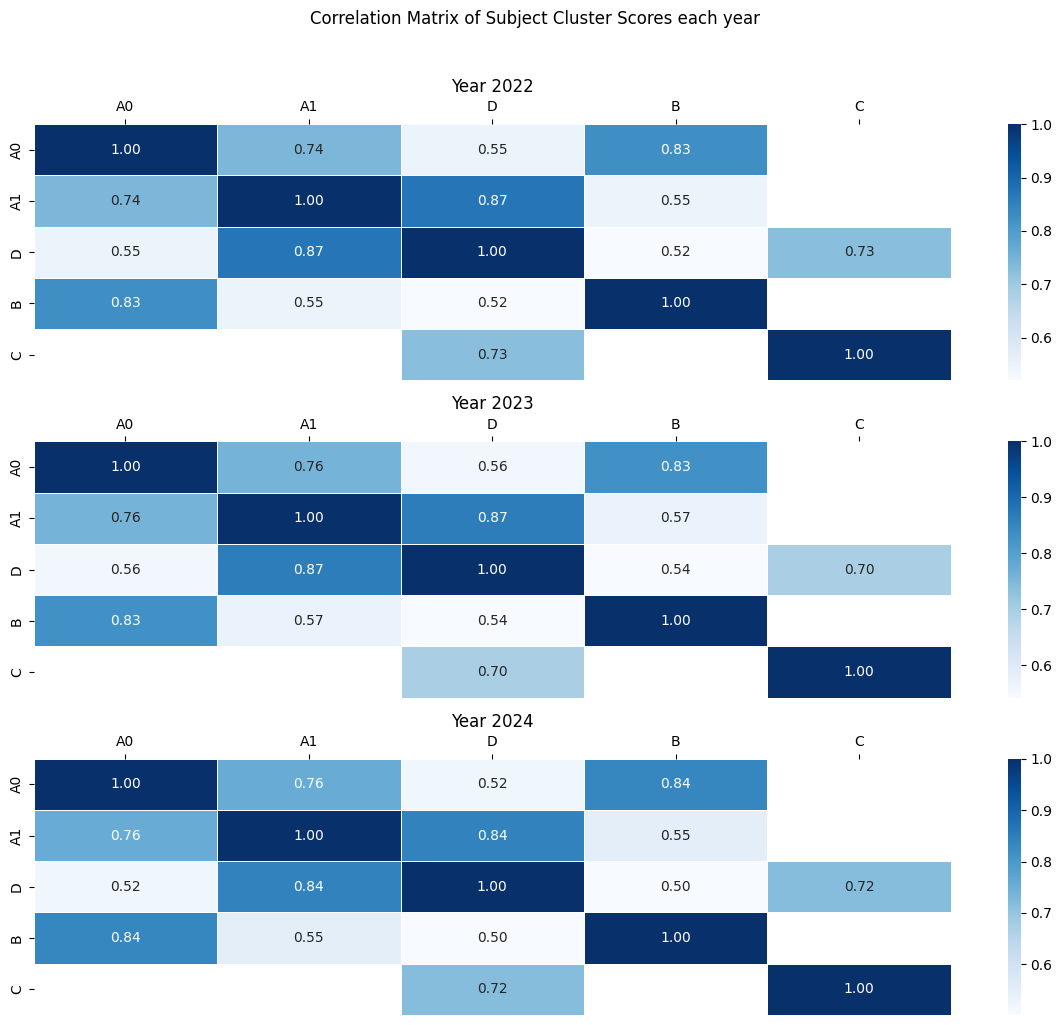

In [ ]:
# 11. Correlation Matrix of Subject Cluster Scores over each year
fig, ax = plt.subplots(3, 1, figsize=(12, 10))
fig.suptitle("Correlation Matrix of Subject Cluster Scores each year", y=1.02, x=0.45)

for i, year in enumerate(years):
    year_data = all_df[all_df['year'] == int(year)][Combination_to_Correlate]
    correlation_matrix = year_data.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=.5, ax=ax[i])
    ax[i].xaxis.tick_top()
    ax[i].xaxis.set_label_position('top')
    ax[i].set_title(f'Year {year}')

plt.tight_layout()
plt.show()